In [1]:
## LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


randomseed = 1234

## DATA LOADING AND PREPROCESSING
# Load the data
gym = pd.read_csv('../../gym_members_exercise_tracking.csv')

# set 'Gender', 'Workout_Type', 'Workout_Frequency (days/week)' and 'Experience_Level' as categorical
for col in ['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']:
    gym[col] = gym[col].astype('category')

# log transform Weight and BMI
gym['Weight (kg)'] = np.log1p(gym['Weight (kg)'])

# transform 'Fat_Percentage'
max_fat = gym['Fat_Percentage'].max()
gym['Fat_Percentage'] = gym['Fat_Percentage'].apply(lambda x: np.sqrt(max_fat+1)-x)

# rename transformed columns
gym.rename(columns={'Weight (kg)': 'LWeight', 'Fat_Percentage': 'SFat_Percentage'}, inplace=True)

gym.drop(columns=['BMI'], inplace=True)

# divide into train and test set
gym_train, gym_test = train_test_split(gym, test_size=0.2, random_state=randomseed)

# Create gym_train_scale, gym_test_scale
gym_train_scale = gym_train.copy()
gym_test_scale = gym_test.copy()

# Scale the data (normalize it)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
gym_train_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']] = scaler.fit_transform(gym_train_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']])

gym_test_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']] = scaler.transform(gym_test_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']])


# Create X_train_exp_level, X_test_exp_level, y_train_exp_level, y_test_exp_level
X_train_exp_level = gym_train.drop(columns=['Experience_Level'])
X_train_exp_level_scale = gym_train_scale.drop(columns=['Experience_Level'])
y_train_exp_level = gym_train['Experience_Level']
X_test_exp_level = gym_test.drop(columns=['Experience_Level'])
X_test_exp_level_scale = gym_test_scale.drop(columns=['Experience_Level'])
y_test_exp_level = gym_test['Experience_Level']

# Create X_train_calories, X_test_calories, y_train_calories, y_test_calories
X_train_calories = gym_train.drop(columns=['Calories_Burned'])
X_train_calories_scale = gym_train_scale.drop(columns=['Calories_Burned'])
y_train_calories = gym_train['Calories_Burned']
X_test_calories = gym_test.drop(columns=['Calories_Burned'])
X_test_calories_scale = gym_test_scale.drop(columns=['Calories_Burned'])
y_test_calories = gym_test['Calories_Burned']

print("Data loaded and preprocessed")

Data loaded and preprocessed


In [4]:
X_train_calories_numeric = X_train_calories.select_dtypes(include=[np.number])  # sélectionne uniquement les colonnes numériques
X_test_calories_numeric = X_test_calories.select_dtypes(include=[np.number])  # sélectionne uniquement les colonnes numériques

# Normalisation des données
X_train_calories_scaled = scaler.fit_transform(X_train_calories_numeric)
X_test_calories_scaled = scaler.transform(X_test_calories_numeric)


In [2]:
display(gym_train.head().style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0))
# display unique values of categorical columns
display(gym_train.info())
for col in gym_train.select_dtypes(include='category').columns:
    print(col, gym_train[col].unique())

,Age,Gender,LWeight,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,SFat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
718,51,Male,4.756173,1.670000,189,139,55,1.380000,950.000000,Yoga,-18.400000,2.500000,3,2
811,27,Male,4.503137,1.870000,169,153,62,1.620000,1363.000000,Strength,-6.700000,3.500000,5,3
366,42,Male,4.348987,1.970000,165,157,65,1.140000,886.000000,HIIT,-16.900000,2.600000,3,2
737,34,Male,4.756173,1.810000,181,167,67,1.360000,1249.000000,Yoga,-18.500000,2.200000,2,1
813,34,Female,4.094345,1.620000,178,150,56,1.130000,847.000000,Cardio,-24.900000,2.400000,4,2


<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 718 to 815
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            778 non-null    int64   
 1   Gender                         778 non-null    category
 2   LWeight                        778 non-null    float64 
 3   Height (m)                     778 non-null    float64 
 4   Max_BPM                        778 non-null    int64   
 5   Avg_BPM                        778 non-null    int64   
 6   Resting_BPM                    778 non-null    int64   
 7   Session_Duration (hours)       778 non-null    float64 
 8   Calories_Burned                778 non-null    float64 
 9   Workout_Type                   778 non-null    category
 10  SFat_Percentage                778 non-null    float64 
 11  Water_Intake (liters)          778 non-null    float64 
 12  Workout_Frequency (days/week)  778 non-

None

Gender ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Workout_Type ['Yoga', 'Strength', 'HIIT', 'Cardio']
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']
Workout_Frequency (days/week) [3, 5, 2, 4]
Categories (4, int64): [2, 3, 4, 5]
Experience_Level [2, 3, 1]
Categories (3, int64): [1, 2, 3]


R²: 0.9701899754867237
MSE: 2326.8118904657213
Coefficients du modèle :  [-40.77844471  13.43539451  13.64368655  -1.94546894  90.50866427
   3.11428855 234.82690391   7.19462563  16.74046663]
Intercept du modèle :  913.284061696658


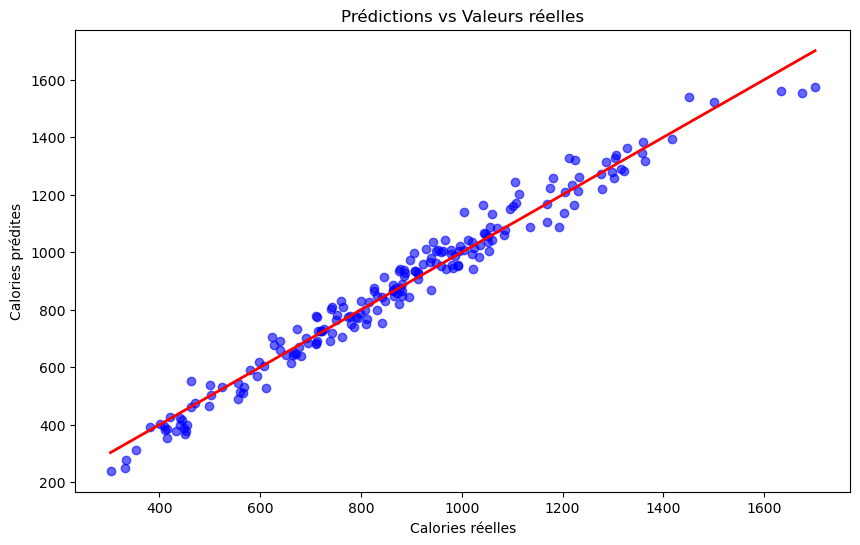

In [7]:
# 1. Importer les bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Créer un modèle de régression linéaire
model = LinearRegression()

# 3. Entraîner le modèle sur les données d'entraînement
model.fit(X_train_calories_scaled, y_train_calories)

# 4. Faire des prédictions sur l'échantillon de test (X_test_scaled)
y_pred_calories = model.predict(X_test_calories_scaled)

# 5. Évaluer la performance du modèle
# Coefficient de détermination R²
r2 = r2_score(y_test_calories, y_pred_calories)
print(f"R²: {r2}")

# Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test_calories, y_pred_calories)
print(f"MSE: {mse}")

# 6. Afficher les coefficients du modèle
print("Coefficients du modèle : ", model.coef_)
print("Intercept du modèle : ", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_calories, y_pred_calories, color='blue', alpha=0.6)
plt.plot([y_test_calories.min(), y_test_calories.max()], [y_test_calories.min(), y_test_calories.max()], color='red', lw=2)  # Ligne idéale
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Prédictions vs Valeurs réelles")
plt.show()


In [ ]:
from sklearn.linear_model import LassoCV

# Appliquer Lasso avec validation croisée pour trouver le meilleur alpha
lasso = LassoCV(cv=5, alphas=np.array(range(1, 50, 1)) / 20., n_jobs=-1, random_state=13).fit(X_train_calories_scaled, y_train_calories)

# Meilleur alpha trouvé par la validation croisée
best_alpha = model_lasso_calories.alpha_
print(f"Meilleur alpha pour Lasso : {best_alpha}")
#help(LassoCV)

Meilleur alpha pour Lasso : 0.05


In [13]:
# Vérifier les dimensions de X_train_calories et les coefficients
print("Shape of X_train_calories: ", X_train_calories.shape)
print("Number of coefficients: ", len(model_lasso_calories.coef_))


Shape of X_train_calories:  (778, 13)
Number of coefficients:  9


Optimal alpha: 0.05
Coefficients du modèle Lasso pour Calories Burned:
Age                         -40.727096
LWeight                      13.394855
Height (m)                   13.610972
Max_BPM                      -1.889760
Avg_BPM                      90.459332
Resting_BPM                   3.064491
Session_Duration (hours)    234.772189
SFat_Percentage               7.202596
Water_Intake (liters)        16.728664
dtype: float64
Lasso conserve 9 variables et en supprime 0


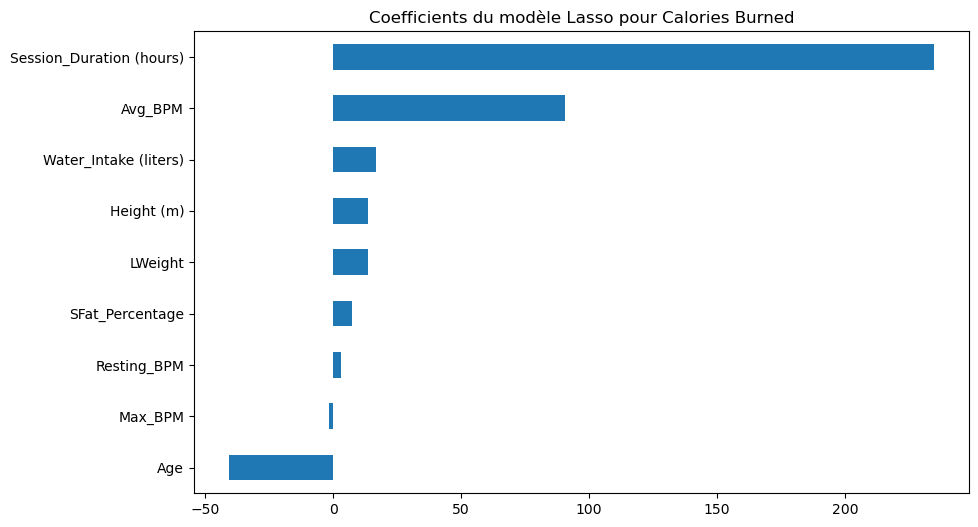

Mean Squared Error (MSE) pour Lasso : 2324.6100787410733


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Appliquer Lasso avec validation croisée pour trouver le meilleur alpha
#lasso = LassoCV(cv=5, random_state=1234, max_iter=10000)  # 5-fold cross-validation
lasso = LassoCV(cv=5, alphas=np.array(range(1, 50, 1)) / 20., n_jobs=-1, random_state=13).fit(X_train_calories_scaled, y_train_calories)
lasso.fit(X_train_calories_scaled, y_train_calories)

# Coefficient optimal alpha sélectionné par LassoCV
optimal_alpha = lasso.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Coefficients du modèle Lasso
coef_calories_lasso = pd.Series(lasso.coef_, index=X_train_calories_numeric.columns)

# Afficher les coefficients du modèle Lasso
print("Coefficients du modèle Lasso pour Calories Burned:")
print(coef_calories_lasso)

# Afficher le nombre de variables conservées et éliminées
print(f"Lasso conserve {sum(coef_calories_lasso != 0)} variables et en supprime {sum(coef_calories_lasso == 0)}")

# Tracer les coefficients
coef_calories_lasso.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Coefficients du modèle Lasso pour Calories Burned')
plt.show()

# Prédictions avec le modèle Lasso
y_pred_lasso = lasso.predict(X_test_calories_scaled)

# Calcul de l'erreur quadratique moyenne pour évaluer les performances du modèle
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test_calories, y_pred_lasso)
print(f"Mean Squared Error (MSE) pour Lasso : {mse_lasso}")


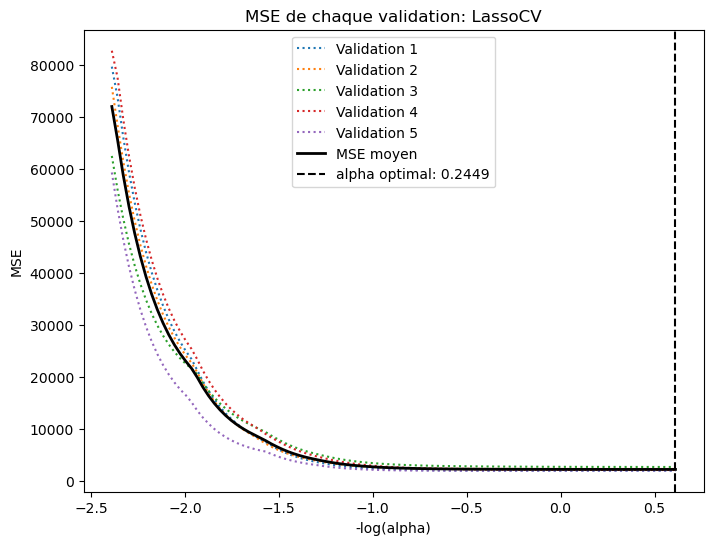

In [21]:
# Création du modèle LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_calories_scaled, y_train_calories)

# Meilleur alpha trouvé par la validation croisée
optimal_alpha = lasso_cv.alpha_
# Tracer les chemins de régularisation
m_log_alphas = -np.log10(lasso_cv.alphas_)

plt.figure(figsize=(8, 6))
plt.plot(m_log_alphas, lasso_cv.mse_path_, ':')
plt.plot(m_log_alphas, lasso_cv.mse_path_.mean(axis=-1), 'k', label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(optimal_alpha), linestyle='--', color='k', label=f'alpha optimal: {optimal_alpha:.4f}')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: LassoCV')
plt.legend(['Validation 1', 'Validation 2', 'Validation 3', 'Validation 4', 'Validation 5', 'MSE moyen', f'alpha optimal: {optimal_alpha:.4f}'])
plt.show()
